In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df = pd.read_csv(r'AirPassengers.csv')

In [9]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

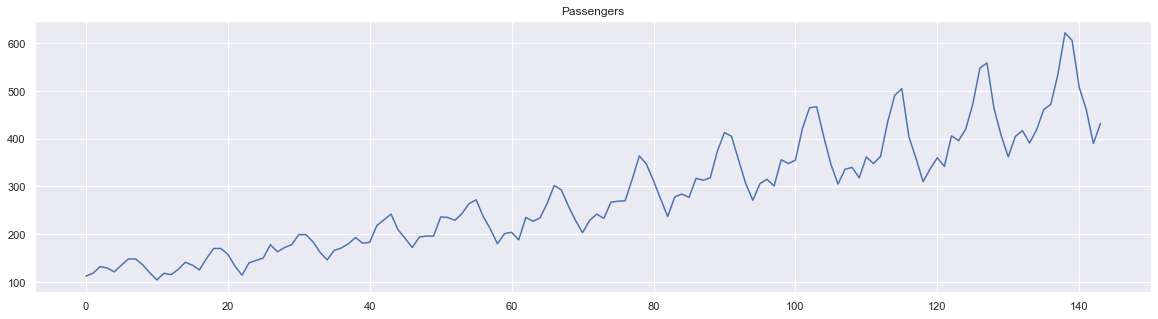

In [12]:
df.Passengers.plot(figsize =(20,5),title = "Passengers")
plt.show()

# QQ plot

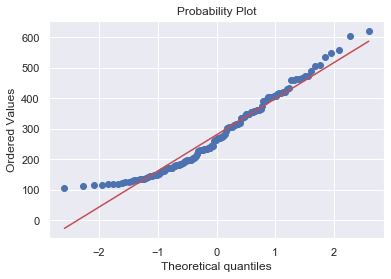

In [13]:
import scipy
import pylab
scipy.stats.probplot(df.Passengers,plot = pylab)
pylab.show()

In [14]:
df.Month.describe()

count         144
unique        144
top       1957-03
freq            1
Name: Month, dtype: object

# Converting Month from string type to date type so that it can be used as an index later

In [15]:
df.Month = pd.to_datetime(df.Month,infer_datetime_format = True)

In [16]:
df.Month.describe()

count                     144
unique                    144
top       1958-06-01 00:00:00
freq                        1
first     1949-01-01 00:00:00
last      1960-12-01 00:00:00
Name: Month, dtype: object

In [17]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [18]:
IndexedDF = df.set_index(["Month"])

In [19]:
IndexedDF.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


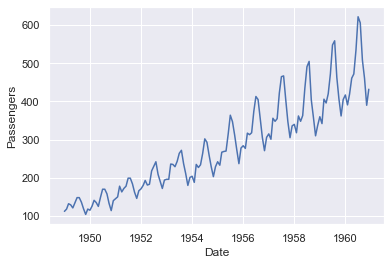

In [21]:
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.plot(IndexedDF)

# Test for stationarity 1 = Rolling Mean

In [24]:
rolmean = IndexedDF.rolling(window=12).mean()
rolstd = IndexedDF.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


# Plotting rolling statistics

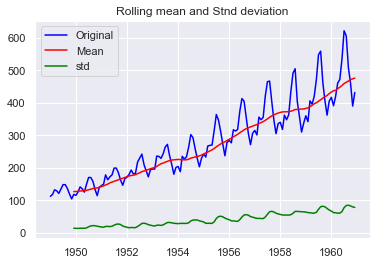

In [27]:
orig = plt.plot(IndexedDF,color = 'blue',label = 'Original')
mean =  plt.plot(rolmean,color = 'red',label = 'Mean')
std =  plt.plot(rolstd,color = 'green',label = 'std')
plt.legend(loc = 'best')
plt.title('Rolling mean and Stnd deviation')
plt.show(block = False)

# ACDF test for stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller
print('Results of the ACDF test :')
dftest = adfuller(IndexedDF['Passengers'],autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index =['Test statistics','p-value','#lags used','# observations used'])
for key,value in dftest[4].items():
                     dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Results of the ACDF test :
Test statistics           0.815369
p-value                   0.991880
#lags used               13.000000
# observations used     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


# Estimating the trend

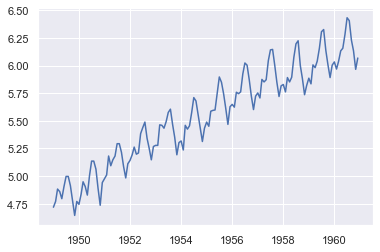

In [32]:
IndexedDF_logScale = np.log(IndexedDF)
plt.plot(IndexedDF_logScale)

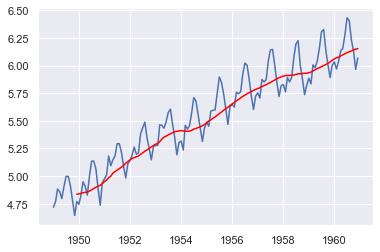

In [33]:
movingAverage = IndexedDF_logScale.rolling(window = 12).mean()
movingstd = IndexedDF_logScale.rolling(window = 12).std()
plt.plot(IndexedDF_logScale)
plt.plot(movingAverage,color = 'red')

In [34]:
datasetLogScaleMinusMovingAverage = IndexedDF_logScale - movingAverage
datasetLogScaleMinusMovingAverage .head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [35]:
#remove the NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage .head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    MovingAverage = timeseries.rolling(window=12).mean()
    Movingstd = timeseries.rolling(window=12).std()
    print(rolmean,rolstd)
    
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean =  plt.plot(MovingAverage,color = 'red',label = 'Rolling Mean')
    std =  plt.plot(Movingstd,color = 'green',label = 'Rolling std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling mean and Stnd deviation')
    plt.show(block = False)
    
    print('Results of the ACDF test :')
    dftest = adfuller(timeseries['Passengers'],autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test statistics','p-value','#lags used','# observations used'])
    for key,value in dftest[4].items():
                         dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


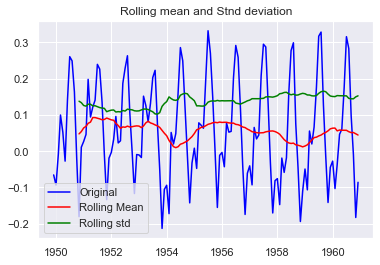

Results of the ACDF test :
Test statistics          -3.162908
p-value                   0.022235
#lags used               13.000000
# observations used     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [41]:
test_stationarity(datasetLogScaleMinusMovingAverage)

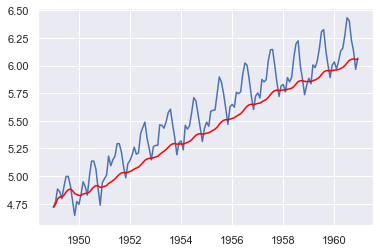

In [42]:
exponentialDecayingWeightedAverage = IndexedDF_logScale.ewm(halflife=12,min_periods=0, adjust = True).mean()
plt.plot(IndexedDF_logScale)
plt.plot(exponentialDecayingWeightedAverage, color = 'red')

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


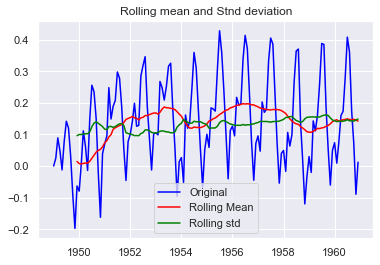

Results of the ACDF test :
Test statistics          -3.601262
p-value                   0.005737
#lags used               13.000000
# observations used     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [43]:
datasetlogScaleMinusexponentialDecayingWeightedAverage = IndexedDF_logScale - exponentialDecayingWeightedAverage
test_stationarity(datasetlogScaleMinusexponentialDecayingWeightedAverage)

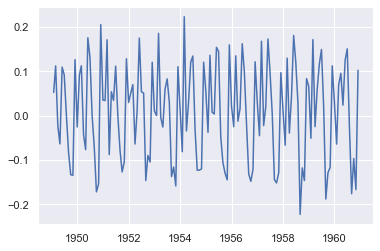

In [44]:
datasetlogDiffShifting = IndexedDF_logScale - IndexedDF_logScale.shift()
plt.plot(datasetlogDiffShifting)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


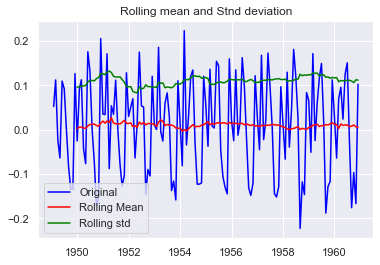

Results of the ACDF test :
Test statistics          -2.717131
p-value                   0.071121
#lags used               14.000000
# observations used     128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [45]:
datasetlogDiffShifting.dropna(inplace = True)
test_stationarity(datasetlogDiffShifting)

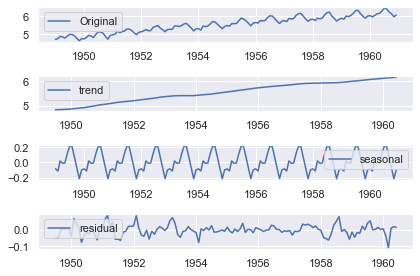

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexedDF_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(IndexedDF_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'residual')
plt.legend(loc = 'best')

plt.tight_layout()


            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


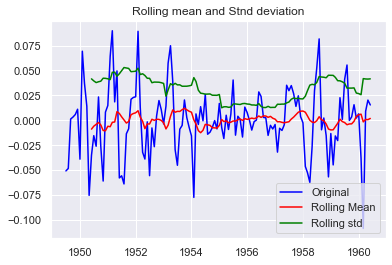

Results of the ACDF test :


KeyError: 'Passengers'

In [60]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

# Inorder to calculate P and Q we will polt ACF and PACF graph respectively

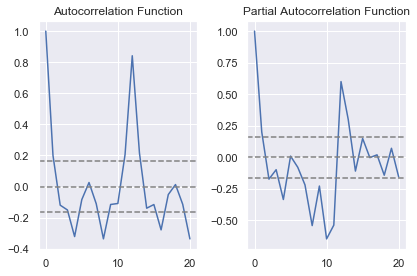

In [63]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogDiffShifting, nlags =20)
lag_pacf = pacf(datasetlogDiffShifting, nlags =20, method = 'ols') #ordinary least square method

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--',color = 'gray')
plt.title('Autocorrelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--',color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [64]:
# P = 2, Q = 2

C:\Users\Kitto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Kitto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR model Plot


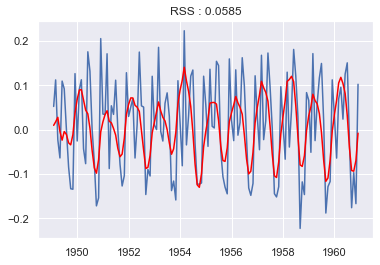

In [66]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(IndexedDF_logScale,order = (2,1,2))
result_AR = model.fit(disp = -1)
plt.plot(datasetlogDiffShifting)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title('RSS : %.4f'% sum(result_AR.fittedvalues-datasetlogDiffShifting["Passengers"])**2)
print('AR model Plot')

In [67]:
#the greater the RSS the bad it is

C:\Users\Kitto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Kitto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS : 0.0003')

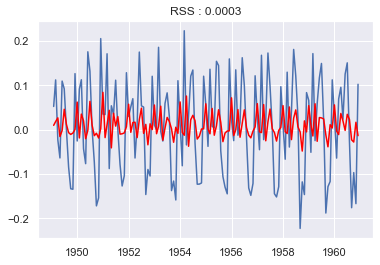

In [70]:
#MA model
model = ARIMA(IndexedDF_logScale,order = (2,1,0))
result_MA = model.fit(disp = -1)
plt.plot(datasetlogDiffShifting)
plt.plot(result_MA.fittedvalues,color = 'red')
plt.title('RSS : %.4f'% sum(result_MA.fittedvalues-datasetlogDiffShifting["Passengers"])**2)

C:\Users\Kitto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Kitto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:0.0585')

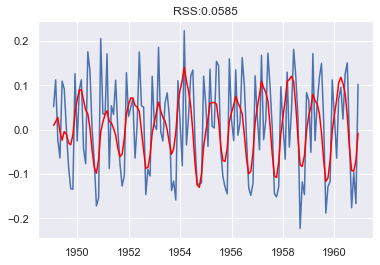

In [71]:
model = ARIMA(IndexedDF_logScale,order = (2,1,2))
result_ARIMA = model.fit(disp = -1)
plt.plot(datasetlogDiffShifting)
plt.plot(result_ARIMA.fittedvalues,color = 'red')
plt.title('RSS:%.4f'% sum(result_ARIMA.fittedvalues-datasetlogDiffShifting["Passengers"])**2)

In [73]:
predictions_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [75]:
#convert to cummulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [81]:
predictions_ARIMA_log = pd.Series(IndexedDF_logScale['Passengers'].ix[0], index = IndexedDF_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_values = 0)
predictions_ARIMA_log.head()

AttributeError: 'Series' object has no attribute 'ix'

In [82]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDf)
plt.plot(predictions_ARIMA)

NameError: name 'predictions_ARIMA_log' is not defined

In [83]:
IndexedDF_logScale

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


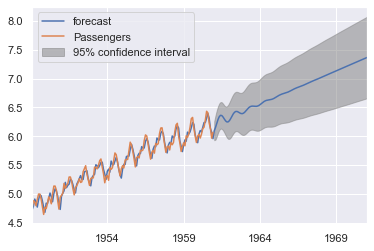

In [84]:
result_ARIMA.plot_predict(1,264)
x = result_ARIMA.forecast(steps = 120) #predicting for 10 years

In [85]:
x[1]

array([0.08384711, 0.10749462, 0.11568695, 0.11702775, 0.11703497,
       0.11744018, 0.1176225 , 0.11778713, 0.12024163, 0.12736042,
       0.13870959, 0.15118792, 0.16157813, 0.16834393, 0.17177328,
       0.17311981, 0.17358731, 0.17385458, 0.17430216, 0.1754333 ,
       0.17788146, 0.18195721, 0.18726216, 0.19283392, 0.19769243,
       0.20130638, 0.20369054, 0.20519831, 0.20625268, 0.20720998,
       0.2083697 , 0.21000326, 0.21229744, 0.21524478, 0.21860179,
       0.22198256, 0.22503064, 0.22755294, 0.22954806, 0.23114797,
       0.23253825, 0.23390534, 0.2354131 , 0.23718312, 0.23926538,
       0.24161538, 0.24410371, 0.24656357, 0.24885256, 0.25089629,
       0.25269733, 0.25431628, 0.25584312, 0.25737228, 0.2589839 ,
       0.2607285 , 0.26261548, 0.2646109 , 0.26664898, 0.26865481,
       0.27056849, 0.27236097, 0.27403701, 0.27562774, 0.27717829,
       0.27873527, 0.28033591, 0.28200018, 0.28372683, 0.2854951 ,
       0.28727211, 0.28902345, 0.29072337, 0.29236083, 0.29394

In [86]:
len(x[1])

120

In [87]:
np.exp(x[1])

array([1.08746262, 1.11348487, 1.12264437, 1.12415063, 1.12415874,
       1.12461435, 1.12481941, 1.12500461, 1.12776932, 1.13582632,
       1.14879044, 1.16321523, 1.17536428, 1.18334353, 1.18740859,
       1.18900855, 1.18956454, 1.18988252, 1.19041521, 1.1917625 ,
       1.1946837 , 1.19956286, 1.2059434 , 1.21268137, 1.21858754,
       1.22299942, 1.22591872, 1.22776852, 1.22906372, 1.23024087,
       1.23166844, 1.23368208, 1.23651561, 1.24016543, 1.24433567,
       1.2485496 , 1.25236109, 1.25552391, 1.25803133, 1.26004568,
       1.26179871, 1.26352488, 1.26543141, 1.26767323, 1.27031561,
       1.27330436, 1.2764767 , 1.27962052, 1.28255292, 1.28517679,
       1.28749353, 1.28957961, 1.29155009, 1.29352659, 1.29561295,
       1.29787524, 1.30032662, 1.3029239 , 1.30558209, 1.30820348,
       1.31070936, 1.31306089, 1.31526348, 1.31735737, 1.31940159,
       1.32145747, 1.32357435, 1.32577896, 1.32807009, 1.33042056,
       1.33278683, 1.33512304, 1.33739457, 1.3395863 , 1.34170